# Exercise 1

## Exercise 1.1

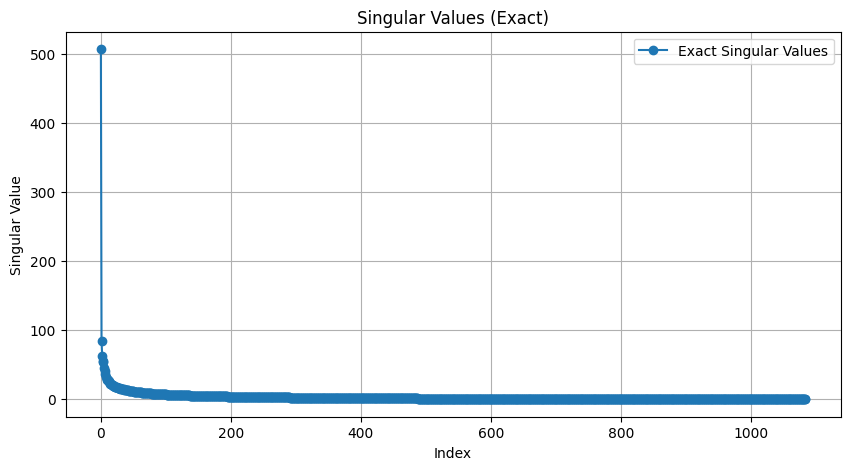

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Load the image
image_path = 'duomodimilano.jpg'
img = io.imread(image_path)

# Convert the image to grayscale
A = np.mean(img.astype(np.float64) / 255, axis=-1)

# Compute the SVD
U, S, V = np.linalg.svd(A, full_matrices=False)

# Plot the singular values
plt.figure(figsize=(10, 5))
plt.plot(S, 'o-', label='Exact Singular Values')
plt.title('Singular Values (Exact)')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
A.shape

(1085, 1920)

In [32]:
# Correcting the randomized SVD function to handle the dimensionality properly.

def randomized_svd(M, k):
    np.random.seed(0)  # Seed for reproducibility
    # Step 1: Create a random matrix that will be used to find the range of M
    random_matrix = np.random.randn(M.shape[1], k)
    
    # Step 2: Sample the column space of M by computing the product M @ random_matrix
    # We can perform the sampling with a power iteration to increase accuracy
    Q = M @ random_matrix
    Q = M @ (M.T @ Q)
    
    # Step 3: Orthonormalize the sampled column space
    Q, _ = np.linalg.qr(Q)
    
    # Step 4: Project M to the lower-dimensional space by right-multiplying with Q
    M_reduced = Q.T @ M
    
    # Step 5: Compute the SVD of the reduced matrix
    U_reduced, s, Vt = np.linalg.svd(M_reduced, full_matrices=False)
    
    # Step 6: Map the computed U back to the high-dimensional space
    U = Q @ U_reduced

    return U, s, Vt

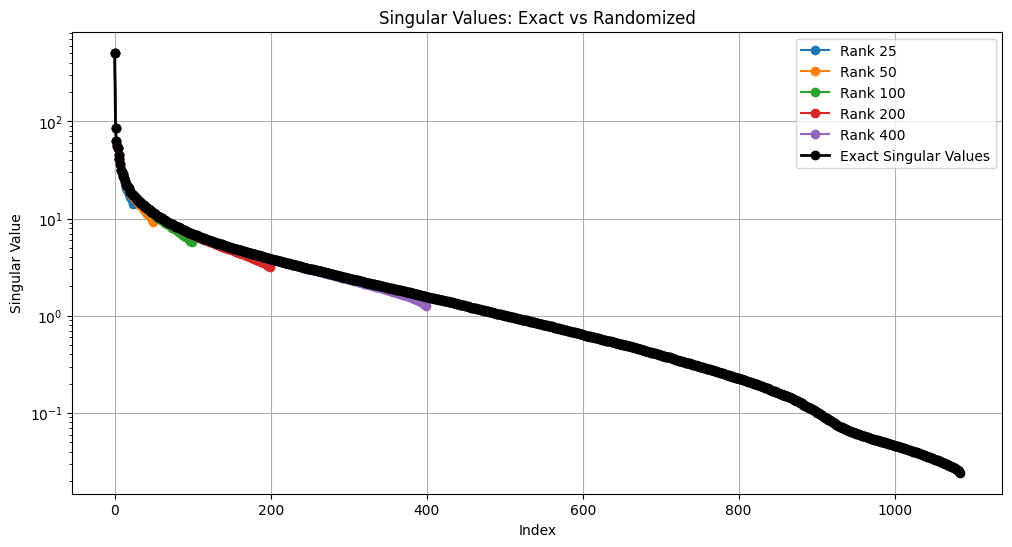

In [36]:
k_values = [25, 50, 100, 200, 400]
# Re-run the randomized SVD for the specified ranks and plot the singular values.
plt.figure(figsize=(12, 6))
for k in k_values:
    _, S_approx, _ = randomized_svd(A, k)
    plt.semilogy(S_approx, 'o-', label=f'Rank {k}')

# Plot the exact singular values for comparison.
plt.semilogy(S, 'o-', label='Exact Singular Values', color='black', linewidth=2)
plt.title('Singular Values: Exact vs Randomized')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.legend()
plt.grid(True)
plt.show()

This plot showcases the first 50 singular values for both the exact and randomized SVD approahces. As we can see, all randomized versions capture the biggest singular values quite well. Such precision starts to decay around index 20. Even then, this indicates that image compression may be successful even with small k for randomized SVD.

## Exercise 1.2

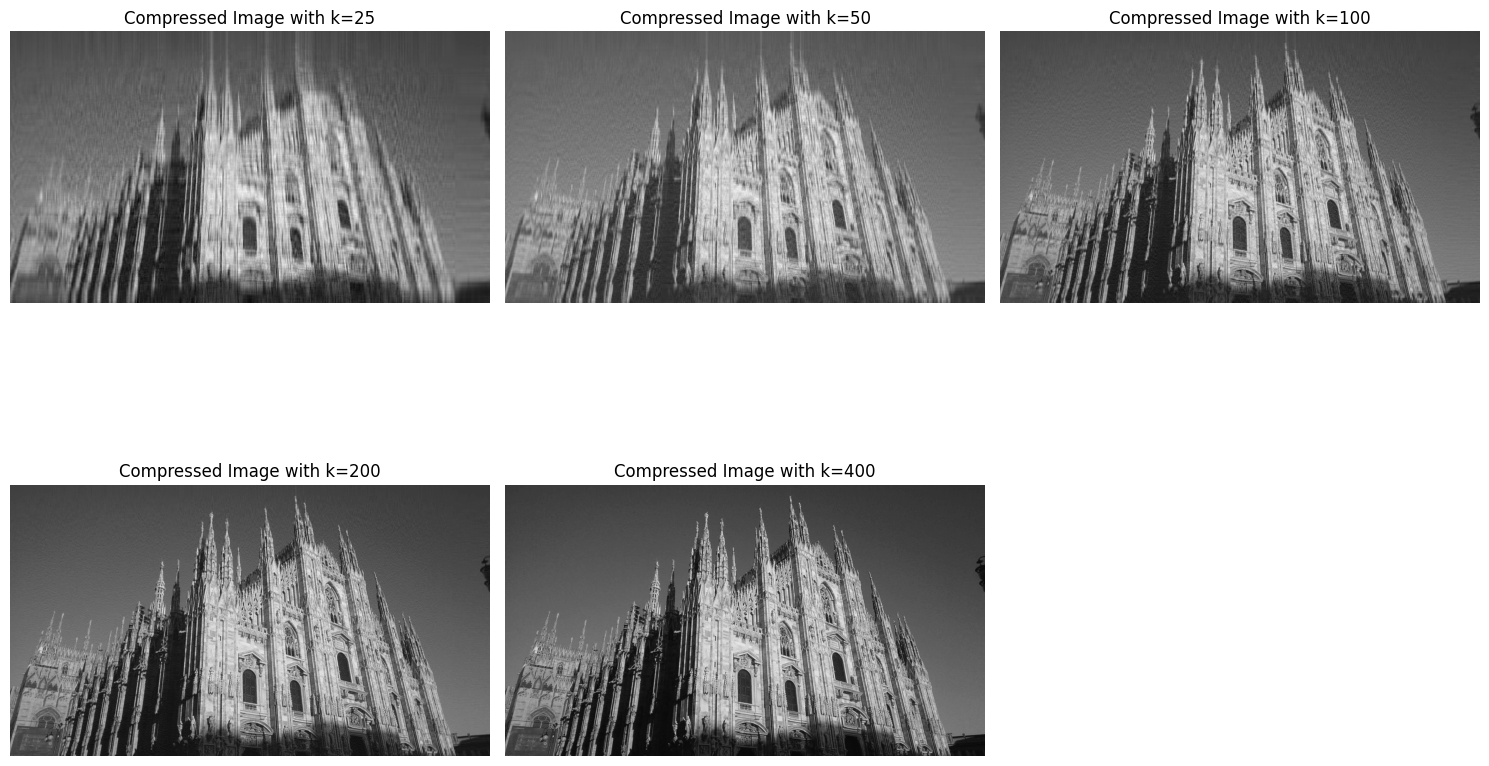

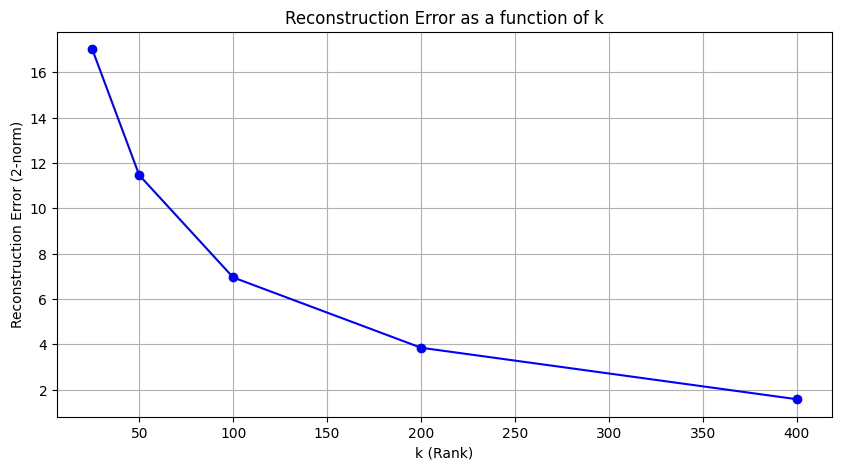

In [39]:
# Compute the exact SVD of the grayscale image matrix
U, S, V = np.linalg.svd(A, full_matrices=False)

# Function to compress the image and calculate the reconstruction error
def compress_image(U, S, V, k, original_img):
    # Take the first k singular values/vectors to compress the image
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    V_k = V[:k, :]
    
    # Reconstruct the image with rank k
    compressed_img = U_k @ S_k @ V_k
    
    # Compute the reconstruction error using the matrix 2-norm
    error = np.linalg.norm(original_img - compressed_img, ord=2)
    
    return compressed_img, error

# Preallocate space for errors
errors_exact = []

# Plot the compressed images for each k
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()
for i, k in enumerate([25, 50, 100, 200, 400]):
    # Compress the image and calculate the error
    compressed_img, error = compress_image(U, S, V, k, A)
    errors_exact.append(error)
    
    # Plot the compressed image
    axs[i].imshow(compressed_img, cmap='gray')
    axs[i].set_title(f'Compressed Image with k={k}')
    axs[i].axis('off')

# Remove the last subplot (not needed)
fig.delaxes(axs[-1])

# Show the plot of compressed images
plt.tight_layout()
plt.show()

# Plot the reconstruction error as a function of k
plt.figure(figsize=(10, 5))
plt.plot([25, 50, 100, 200, 400], errors_exact, 'o-', color='blue')
plt.title('Reconstruction Error as a function of k')
plt.xlabel('k (Rank)')
plt.ylabel('Reconstruction Error (2-norm)')
plt.grid(True)
plt.show()


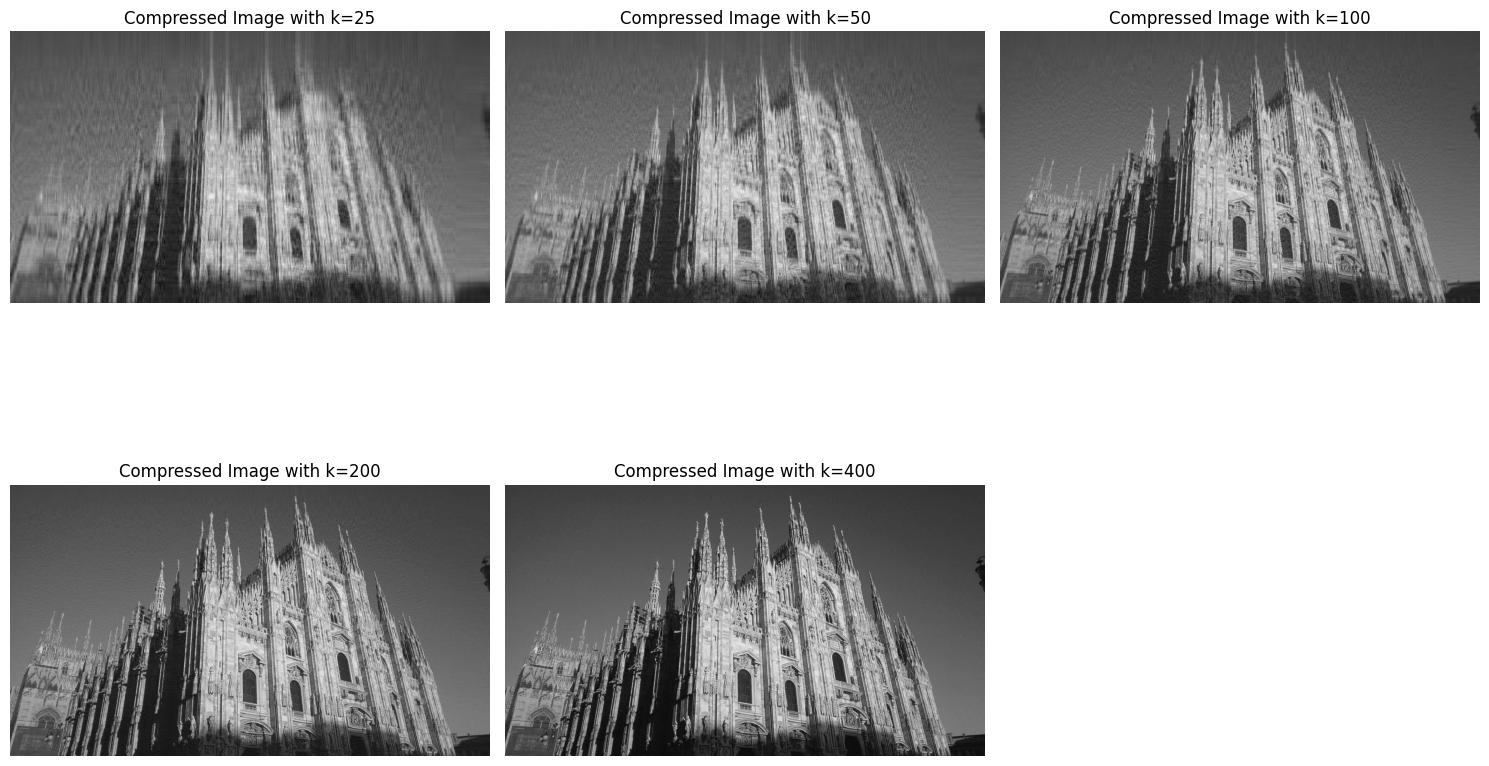

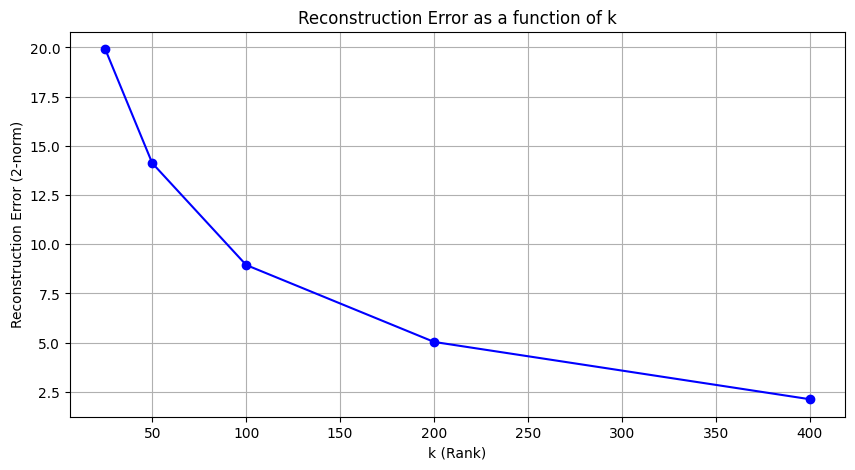

In [43]:
# Function to compress the image and calculate the reconstruction error
def compress_image_randomized(original_img, k):
    U, S, V = randomized_svd(original_img, k)
    
    # Take the first k singular values/vectors to compress the image
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    V_k = V[:k, :]
    
    # Reconstruct the image with rank k
    compressed_img = U_k @ S_k @ V_k
    
    # Compute the reconstruction error using the matrix 2-norm
    error = np.linalg.norm(original_img - compressed_img, ord=2)
    
    return compressed_img, error

# Preallocate space for errors
errors_rand = []

# Plot the compressed images for each k
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()
for i, k in enumerate([25, 50, 100, 200, 400]):
    # Compress the image and calculate the error
    compressed_img, error = compress_image_randomized(A, k)
    errors_rand.append(error)
    
    # Plot the compressed image
    axs[i].imshow(compressed_img, cmap='gray')
    axs[i].set_title(f'Compressed Image with k={k}')
    axs[i].axis('off')

# Remove the last subplot (not needed)
fig.delaxes(axs[-1])

# Show the plot of compressed images
plt.tight_layout()
plt.show()

# Plot the reconstruction error as a function of k
plt.figure(figsize=(10, 5))
plt.plot([25, 50, 100, 200, 400], errors_rand, 'o-', color='blue')
plt.title('Reconstruction Error as a function of k')
plt.xlabel('k (Rank)')
plt.ylabel('Reconstruction Error (2-norm)')
plt.grid(True)
plt.show()


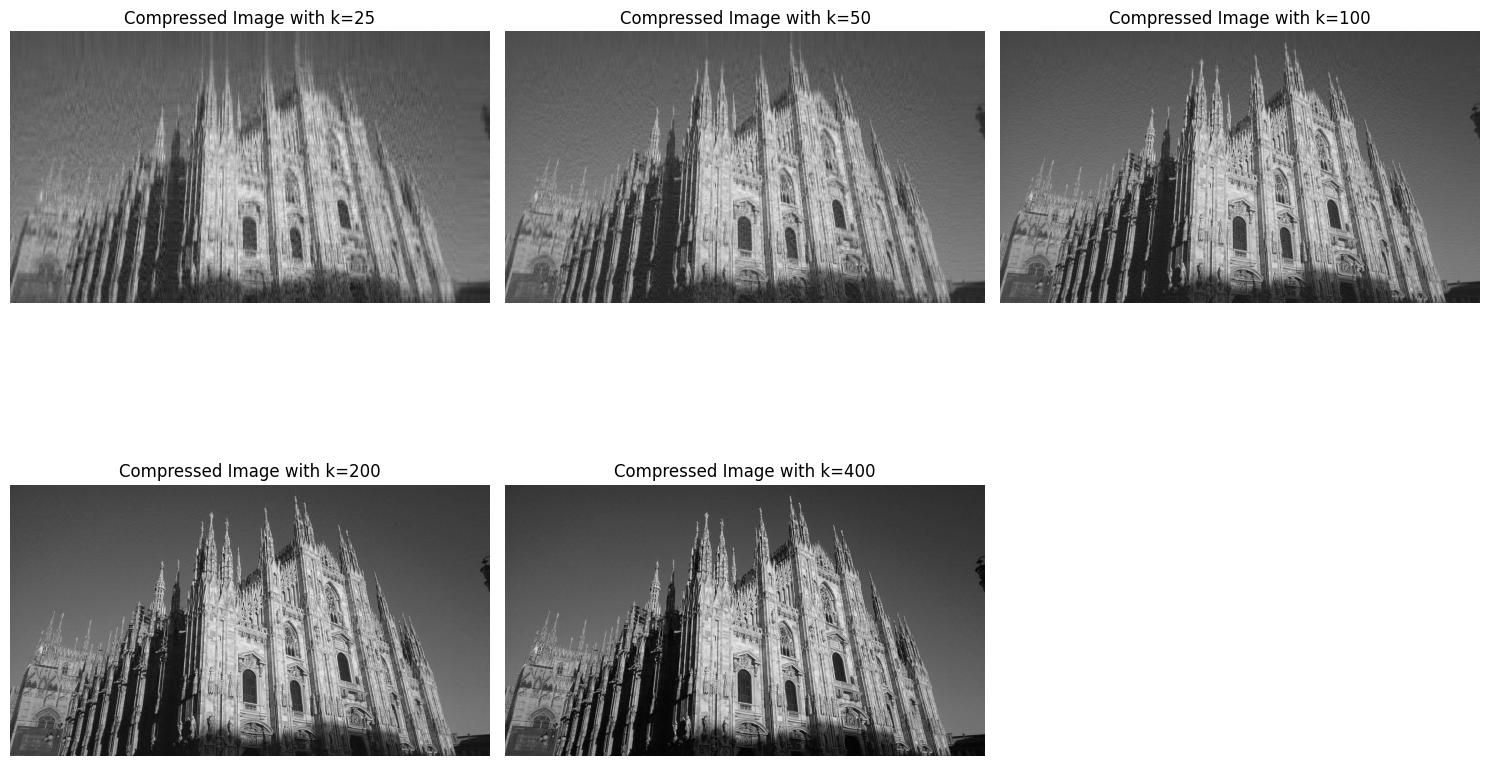

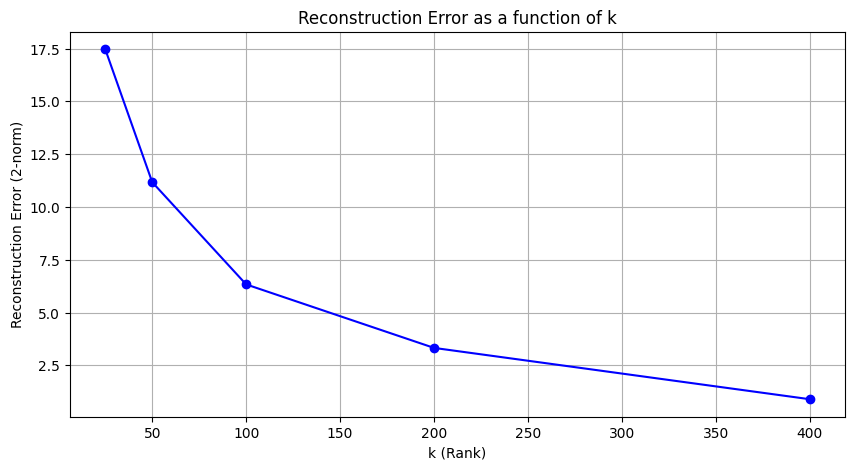

In [44]:
# Function to compress the image and calculate the reconstruction error
def compress_image_randomized_oversampling(original_img, k):
    U, S, V = randomized_svd(original_img, k)
    
    # Take the first k singular values/vectors to compress the image
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    V_k = V[:k, :]
    
    # Reconstruct the image with rank k
    compressed_img = U_k @ S_k @ V_k
    
    # Compute the reconstruction error using the matrix 2-norm
    error = np.linalg.norm(original_img - compressed_img, ord=2)
    
    return compressed_img, error

# Preallocate space for errors
errors_rand_ov = []

# Plot the compressed images for each k
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()
for i, k in enumerate([25, 50, 100, 200, 400]):
    # Compress the image and calculate the error
    compressed_img, error = compress_image_randomized_oversampling(A, int(1.5 * k))
    errors_rand_ov.append(error)
    
    # Plot the compressed image
    axs[i].imshow(compressed_img, cmap='gray')
    axs[i].set_title(f'Compressed Image with k={k}')
    axs[i].axis('off')

# Remove the last subplot (not needed)
fig.delaxes(axs[-1])

# Show the plot of compressed images
plt.tight_layout()
plt.show()

# Plot the reconstruction error as a function of k
plt.figure(figsize=(10, 5))
plt.plot([25, 50, 100, 200, 400], errors_rand_ov, 'o-', color='blue')
plt.title('Reconstruction Error as a function of k')
plt.xlabel('k (Rank)')
plt.ylabel('Reconstruction Error (2-norm)')
plt.grid(True)
plt.show()


## Exercise 1.3

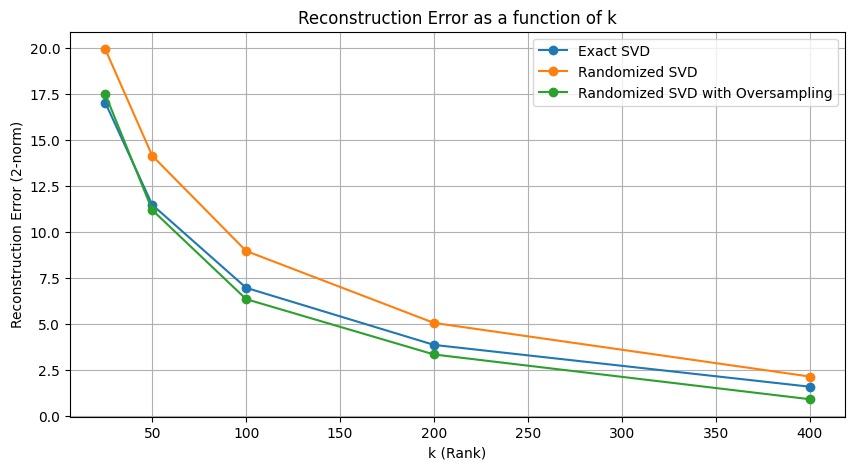

In [45]:
# Plot the reconstruction error as a function of k for all three methods
plt.figure(figsize=(10, 5))
plt.plot([25, 50, 100, 200, 400], errors_exact, 'o-', label='Exact SVD')
plt.plot([25, 50, 100, 200, 400], errors_rand, 'o-', label='Randomized SVD')
plt.plot([25, 50, 100, 200, 400], errors_rand_ov, 'o-', label='Randomized SVD with Oversampling')
plt.title('Reconstruction Error as a function of k')
plt.xlabel('k (Rank)')
plt.ylabel('Reconstruction Error (2-norm)')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
import time

# Exact SVD computation
start_time = time.time()
U_exact, S_exact, Vt_exact = np.linalg.svd(A, full_matrices=False)
exact_svd_time = time.time() - start_time

k = 200

# Randomized SVD computation
start_time = time.time()
U_randomized, S_randomized, Vt_randomized = randomized_svd(A, k=k)
randomized_svd_time = time.time() - start_time

# Randomized SVD with oversampling computation
start_time = time.time()
U_randomized_oversampling, S_randomized_oversampling, Vt_randomized_oversampling = randomized_svd(A, k=int(k*1.5))
randomized_svd_oversampling_time = time.time() - start_time

print(f'Exact SVD time: {exact_svd_time:.4f} seconds')
print(f'Randomized SVD time: {randomized_svd_time:.4f} seconds')
print(f'Randomized SVD with oversampling time: {randomized_svd_oversampling_time:.4f} seconds')

Exact SVD time: 3.0431 seconds
Randomized SVD time: 0.4457 seconds
Randomized SVD with oversampling time: 0.7164 seconds


# Exercise 2


## Exercise 2.1

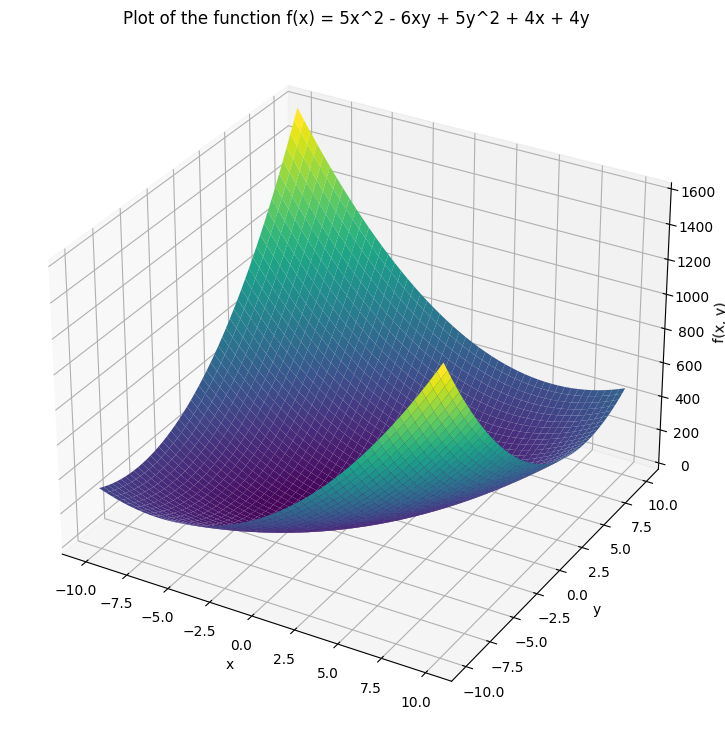

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function f(x, y)
def f(x, y):
    return 5*x**2 - 6*x*y + 5*y**2 + 4*x + 4*y

# Create a grid of points
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
x, y = np.meshgrid(x, y)
z = f(x, y)

# Plot the function
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Plot of the function f(x) = 5x^2 - 6xy + 5y^2 + 4x + 4y')

# Show the plot
plt.show()

## Exercise 2.2

In [49]:
from scipy.optimize import minimize

# Define the function to minimize
def func_to_minimize(x):
    return 5*x[0]**2 - 6*x[0]*x[1] + 5*x[1]**2 + 4*x[0] + 4*x[1]

# Initial guess for x and y
initial_guess = [0, 0]

# Use scipy's minimize function to find the minimum
result = minimize(func_to_minimize, initial_guess)

# The result object contains various information from the optimization process
xmin_scipy = result.x
fmin_scipy = result.fun

xmin_scipy, fmin_scipy

(array([-1.00000001, -1.00000001]), -4.0)

## Exercise 2.3

To express the given function in the form $f(x) = \frac{1}{2}x^T Hx + d^T x + c$, we identify the quadratic, linear, and constant parts of $f(x, y) = 5x^2 - 6xy + 5y^2 + 4x + 4y$.

The quadratic form $\frac{1}{2}x^T Hx$ corresponds to the part of the function involving $ x^2 $ and $ y^2 $, and the mixed term $ xy $. For our function, $ H $ is a 2x2 matrix where the diagonal elements are the coefficients of $ x^2 $ and $ y^2 $ (multiplied by 2 because of the $ \frac{1}{2} $ in front of the quadratic form), and the off-diagonal elements are half of the coefficient of the $ xy $ term (since $ x^T Hx $ will produce two $ xy $ terms when expanded). The vector $ d $ contains the coefficients of the linear terms $ x $ and $ y $, and $ c $ is the constant term.

Let's write down the matrix $ H $, the vector $ d $, and the constant $ c $, and then we can determine whether $ H $ is positive definite.

The matrix $ H $ is:
\begin{equation}
H = \begin{bmatrix} 10 & -6 \\ -6 & 10 \end{bmatrix}
\end{equation}

The vector $ d $ is:
\begin{equation}
d = \begin{bmatrix} 4 \\ 4 \end{bmatrix}
\end{equation}

The constant $ c $ is zero in this case since there is no constant term in the function $ f(x) $.

To check if $ H $ is positive definite, we can look at its eigenvalues: a symmetric matrix is positive definite if and only if all its eigenvalues are positive. Let's compute the eigenvalues.

The matrix $ H $, vector $ d $, and constant $ c $ for the function $ f(x) $ are:

\begin{equation}
H = \begin{bmatrix} 10 & -6 \\ -6 & 10 \end{bmatrix}, \quad d = \begin{bmatrix} 4 \\ 4 \end{bmatrix}, \quad c = 0
\end{equation}

The eigenvalues of $ H $ are $ [16, 4] $. Since all eigenvalues are positive, the matrix $ H $ is positive definite. This indicates that the function $ f(x) $ is convex, and therefore the point found earlier, $ x_{\text{min}} = (-1, -1) $, is indeed the global minimum of the function.

The matrix $ H $ in the expression $ f(x) = \frac{1}{2}x^T Hx + d^T x + c $ is called the Hessian matrix of the function $ f $. In the context of optimization and calculus, the Hessian matrix is a square matrix of second-order partial derivatives of a scalar-valued function, or scalar field. It describes the local curvature of a function of many variables.

## Exercise 2.4

The gradient descent (GD) method is defined by the iteration:

\begin{equation}
x_{k+1} = x_k - \alpha \nabla f(x_k)
\end{equation}

where $ \alpha $ is the learning rate. The function $ f $ can be written in the form $ f(x) = \frac{1}{2}x^T Hx + d^T x + c $, where $ H $ is the Hessian matrix, $ d $ is a vector of coefficients for the linear terms, and $ c $ is a constant. The gradient $ \nabla f(x) $ is then given by:

\begin{equation}
\nabla f(x) = Hx + d
\end{equation}

Substituting the gradient into the GD iteration gives:
\begin{equation}
x_{k+1} = x_k - \alpha (Hx_k + d)
\end{equation}
For gradient descent to be convergent, the spectral radius $ \rho $ of the iteration matrix must be less than 1. The iteration matrix in this case would be $ I - \alpha H $, where $ I $ is the identity matrix.

The spectral radius $ \rho $ is the largest absolute value among the eigenvalues of the iteration matrix. Therefore, we require:
\begin{equation}
\rho(I - \alpha H) < 1
\end{equation}

This inequality must be satisfied by all eigenvalues $ \lambda_i $ of $ H $:
\begin{equation}
\left| 1 - \alpha \lambda_i \right| < 1
\end{equation}

Thus:

\begin{equation}
    \begin{cases}
      1 - \alpha \lambda_i < 1 &\implies \alpha \lambda_i > 0&, 1 - \alpha \lambda_i > 0 \\
      -1+\alpha \lambda_i < 1 &\implies \alpha < \frac{2}{\lambda_i}&, 1 - \alpha \lambda_i < 0
    \end{cases}\,.
\end{equation}




## Exercise 2.5

Considering that $\alpha \lambda_i$ is always positive given that the eigenvalues are $[16, 4]$, and that $16$ is the largest eigenvalue, we have that:

\begin{equation}
    \alpha < \frac{2}{16} = \frac{1}{8}
\end{equation}

## Exercise 2.6

In [59]:
def gradient_descent(f, grad_f, initial_x, alpha, epsilon, max_iterations):
    """
    Implements the gradient descent optimization algorithm.
    
    :param f: The function to be minimized.
    :param grad_f: The gradient of the function.
    :param initial_x: Initial guess for the minimum.
    :param alpha: Learning rate.
    :param epsilon: Convergence tolerance.
    :param max_iterations: Maximum number of iterations.
    :return: The approximate minimum point.
    """
    x = np.array(initial_x, dtype=float)
    for _ in range(max_iterations):
        x_new = x - alpha * np.array(grad_f(x))
        # Check for convergence
        if np.abs(f(x_new) - f(x)) < epsilon:
            return x_new
        x = x_new
    return x

import jax
import jax.numpy as jnp

# Define the function f(x, y) using jax.numpy
def func_jax(x):
    return 5*x[0]**2 - 6*x[0]*x[1] + 5*x[1]**2 + 4*x[0] + 4*x[1]

# Use jax.grad to automatically compute the gradient of the function
grad_func_jax = jax.grad(func_jax)

# Initial guess, learning rate, tolerance, and maximum iterations
initial_guess = [-5, 7]
learning_rate = 0.125  # from previous calculation
tolerance = 1e-3
max_iterations = 200

# Perform gradient descent
xmin_gd = gradient_descent(func_jax, grad_func_jax, initial_guess, learning_rate, tolerance, max_iterations)

f"Minimum point: {xmin_gd}, Minimum value: {func_jax(xmin_gd)}, did not converge near the true minimum"

'Minimum point: [-6.9921875  5.0078125], Minimum value: 572.000244140625, did not converge near the true minimum'

In [61]:
# Initial guess, learning rate, tolerance, and maximum iterations
initial_guess = [-5, 7]
learning_rate = 0.123  # from previous calculation
tolerance = 1e-3
max_iterations = 200

# Perform gradient descent
xmin_gd = gradient_descent(func_jax, grad_func_jax, initial_guess, learning_rate, tolerance, max_iterations)

f"Minimum point: {xmin_gd}, Minimum value: {func_jax(xmin_gd)}, converged near the minimum"

'Minimum point: [-0.97008847 -1.02991164], Minimum value: -3.985684753178961, converged near the minimum'

# Exercise 3

In [71]:
x = 1

In [77]:
# build a network with 1 input neural, 5 hidden layers with 2 neurons each, and 1 output neuron
# the top neuron of each hidden layers applies sin(x + y) to the output of the previous layer
# the bottom neuron of each hidden layers applies cos(x + y) to the output of the previous layer

def sin_cos(x, y):
    return jnp.sin(x + y), jnp.cos(x + y)

def neural_network(x):
    x, y = sin_cos(x, 0.0)
    x, y = sin_cos(x, y)
    x, y = sin_cos(x, y)
    x, y = sin_cos(x, y)
    x, y = sin_cos(x, y)
    return x * y

# compute the gradient of the neural network function
grad_neural_network = jax.grad(neural_network)

neural_network(1.0), grad_neural_network(1.0)

(Array(0.3200912, dtype=float32, weak_type=True),
 Array(-0.06918568, dtype=float32, weak_type=True))

In [84]:
x = 1.0
l1 = sin_cos(x, 0.0)
l2 = sin_cos(*l1)
l3 = sin_cos(*l2)
l4 = sin_cos(*l3)
l5 = sin_cos(*l4)
l6 = l5[0] * l5[1]
l6

Array(0.3200912, dtype=float32, weak_type=True)

In [100]:
# Since we are in a new execution environment, let's re-import NumPy and define the forward propagation function again
import numpy as np

res = {}
def forward_propagation(x):
    print(f'x: {x}')
    res['x'] = x
    # Initialize the outputs of the first hidden layer
    u = np.sin(x)
    v = np.cos(x)
    res['u1'] = u
    res['v1'] = v
    print(f'u1: {u}, v1: {v}')
    # Iterate over the next 4 hidden layers
    for k in range(4):  # 4 additional layers to make 5 hidden layers in total
        u, v = np.sin(u + v), np.cos(u + v)
        print(f'u{k+2}: {u}, v{k+2}: {v}')
        res[f'u{k+2}'] = u
        res[f'v{k+2}'] = v

    # The output neuron computes the product of the last two neurons' outputs
    output = u * v
    res['output'] = output
    return output

# Compute the output of the network for x=1
network_output = forward_propagation(1)
network_output


x: 1
u1: 0.8414709848078965, v1: 0.5403023058681398
u2: 0.9821882747658729, v2: 0.1878994223313054
u3: 0.9207848093656193, v3: 0.3900709356534015
u4: 0.9664052516984224, v4: 0.257023130262062
u5: 0.9402719838996335, v5: 0.34042414176060914


0.32009128314057805

In [117]:
du1 = res['v1']
dv1 = -res['u1']
du2 = (du1 + dv1) * res['v2']
dv2 = (du1 + dv1) * -res['u2']
du3 = (du2 + dv2) * res['v3']
dv3 = (du2 + dv2) * -res['u3']
du4 = (du3 + dv3) * res['v4']
dv4 = (du3 + dv3) * -res['u4']
du5 = (du4 + dv4) * res['v5']
dv5 = (du4 + dv4) * -res['u5']

dy = du5 * res['v5'] + dv5 * res['u5']

In [119]:
print(f'{du1}\n {dv1}\n {du2}\n {dv2}\n {du3}\n {dv3}\n {du4}\n {dv4}\n {du5}\n {dv5}\n {dy}')

0.5403023058681398
 -0.8414709848078965
 -0.056589420797062674
 0.29580434518135673
 0.09331078937683927
 -0.22026546854660325
 -0.03263028904162854
 0.12268966867734823
 0.030658387019982757
 -0.0846803115588484
 -0.06918566945763523


Solved in "paper" as well, analytically

[First image](./ex3-1.png)

[Second image](./ex3-2.png)